# Description

Team Name: Pioneers

Team Members: 

Tulasi Aruna Kumari Dhupam

Prithika Rajidi

Mounika Daggubai

Bhargav Krishna boddupalli

Bharath Kumar Pamidala


Model : Multiple Linear Regression 

Source Links :


[1]. https://scikit-learn.org/stable/modules/preprocessing.html

[2].https://scikit-learn.org/stable/modules/preprocessing.html#mapping-to-a-gaussian-distribution

[3]. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

[4]. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

[5]. https://www.tensorflow.org/api_docs/python/tf/image/resize

[6].https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

[7].https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

[8].https://stackoverflow.com/questions/42592493/displaying-pair-plot-in-pandas-data-frame#

[9].https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04

[10].https://www.ideaconnection.com/syngenta-crop-challenge/challenge.php/



# Description

The main objective is to consistently analyze production of crop in tons based on continues observation on area(hect) of crop in every state yearly.

In [335]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import scipy as pearsonr
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [336]:
# import and reading dataset
crop= pd.read_excel('D:/SHU_University/AI/DT1.xlsx')
crop

,year,State,Area(hect),Production(tons),yield(kg/hect)
0,1974,Andhra Pradesh,NaN,5700.3,1604.0
1,1975,Andhra Pradesh,3894.5,6451.3,1657.0
2,1975,Andhra Pradesh,3894.5,6451.3,1657.0
3,1976,Andhra Pradesh,3565.2,4929.7,1383.0
4,1977,Andhra Pradesh,3662.3,5604.7,1530.0
...,...,...,...,...,...
724,1995,DAMAN AND DIU,2.0,2.9,1450.0
725,1996,DAMAN AND DIU,2.0,2.9,1450.0
726,1997,DAMAN AND DIU,2.0,2.9,1450.0
727,1998,DAMAN AND DIU,2.0,3.3,1650.0


In [337]:
#check the number of samples
print(type(crop))
print(crop.shape)

<class 'pandas.core.frame.DataFrame'>
(729, 5)


# Output

We have 729 samples with 5 features

In [338]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              729 non-null    int64  
 1   State             729 non-null    object 
 2   Area(hect)        728 non-null    float64
 3   Production(tons)  729 non-null    float64
 4   yield(kg/hect)    729 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 28.6+ KB


# Output

Year as int datatype with no null values

State as object data type with no null values

Area(hect) as float data type , 728 with samples no null values

Production(tons) as float data type with no null values

yield(kg/hect) as float data type with no null values

In [339]:
# Count of duplicates values and removing duplicates
crop.drop_duplicates()

,year,State,Area(hect),Production(tons),yield(kg/hect)
0,1974,Andhra Pradesh,NaN,5700.3,1604.0
1,1975,Andhra Pradesh,3894.5,6451.3,1657.0
3,1976,Andhra Pradesh,3565.2,4929.7,1383.0
4,1977,Andhra Pradesh,3662.3,5604.7,1530.0
5,1978,Andhra Pradesh,3979.1,7432.2,1868.0
...,...,...,...,...,...
724,1995,DAMAN AND DIU,2.0,2.9,1450.0
725,1996,DAMAN AND DIU,2.0,2.9,1450.0
726,1997,DAMAN AND DIU,2.0,2.9,1450.0
727,1998,DAMAN AND DIU,2.0,3.3,1650.0


# Output

Displayed 728 samples after dropping the 1 duplicate sample 

In [340]:
#Drop the rows where at least one element is missing.
crop.dropna()

,year,State,Area(hect),Production(tons),yield(kg/hect)
1,1975,Andhra Pradesh,3894.5,6451.3,1657.0
2,1975,Andhra Pradesh,3894.5,6451.3,1657.0
3,1976,Andhra Pradesh,3565.2,4929.7,1383.0
4,1977,Andhra Pradesh,3662.3,5604.7,1530.0
5,1978,Andhra Pradesh,3979.1,7432.2,1868.0
...,...,...,...,...,...
724,1995,DAMAN AND DIU,2.0,2.9,1450.0
725,1996,DAMAN AND DIU,2.0,2.9,1450.0
726,1997,DAMAN AND DIU,2.0,2.9,1450.0
727,1998,DAMAN AND DIU,2.0,3.3,1650.0


# Output

Displayed 728 samples after dropping the 1 missing sample 

In [341]:
# Getting the min, max, Q1 and Q2 
crop.describe()

,year,Area(hect),Production(tons),yield(kg/hect)
count,729.000000,728.000000,729.000000,729.000000
mean,1986.484225,1469.381044,2297.869547,1599.982385
std,7.512084,1903.467418,3036.925117,633.982188
min,1974.000000,1.100000,1.600000,309.000000
25%,1980.000000,88.600000,110.700000,1126.000000
50%,1986.000000,302.950000,556.600000,1463.000000
75%,1993.000000,2275.425000,3830.200000,1997.000000
max,1999.000000,6176.000000,13951.000000,3579.000000


# Output

Minimum values of year = 1974 , Area(hect) = 1.1 , Production(tons) = 1.6 and yield(kg/hect) = 309

Maximum values of year = 1999 , Area(hect) = 6176 , production(tons) = 13951 and yield(kg/hect) = 3759

Q1 values of year = 1980 ,  Area(hect) = 88.60 , production(tons) = 110.7 and yield(kg/hect) = 1126

Q2 values of year = 1986 ,  Area(hect) = 302.95 , production(tons) = 556.6 and yield(kg/hect) = 1463


In [342]:
crop1 = crop.copy()
crop1

,year,State,Area(hect),Production(tons),yield(kg/hect)
0,1974,Andhra Pradesh,NaN,5700.3,1604.0
1,1975,Andhra Pradesh,3894.5,6451.3,1657.0
2,1975,Andhra Pradesh,3894.5,6451.3,1657.0
3,1976,Andhra Pradesh,3565.2,4929.7,1383.0
4,1977,Andhra Pradesh,3662.3,5604.7,1530.0
...,...,...,...,...,...
724,1995,DAMAN AND DIU,2.0,2.9,1450.0
725,1996,DAMAN AND DIU,2.0,2.9,1450.0
726,1997,DAMAN AND DIU,2.0,2.9,1450.0
727,1998,DAMAN AND DIU,2.0,3.3,1650.0


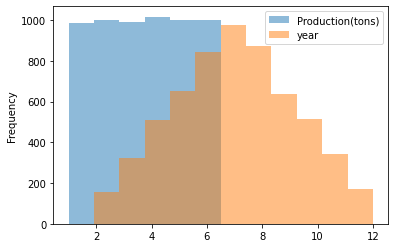

In [343]:
#Getting the data using histogram
crop = pd.DataFrame(np.random.randint(1, 7, 6000),columns = ['Production(tons)'])
crop['year'] = crop['Production(tons)']+ np.random.randint(1, 7, 6000)
ax = crop.plot.hist(bins=12, alpha=0.5)

# Output
Comparing the production(tons) and year in the histogram plotting


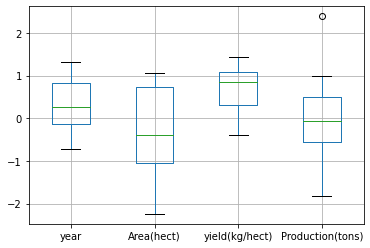

In [344]:
#Getting the data using box-plot
np.random.seed(1234)
crop = pd.DataFrame(np.random.randn(10, 4),
                  columns=['year', 'Area(hect)', 'yield(kg/hect)', 'Production(tons)'])
boxplot = crop.boxplot(column=['year', 'Area(hect)', 'yield(kg/hect)','Production(tons)'])
#boxplot = crop.boxplot(grid=False, rot=45, fontsize=15) 

# Output

We have one outlier in the production(tons).  Average year is greater than 0 , yield(kg/hect) is near to 1 , Area(hect) and Production(tons) is less than 0.

In [345]:
# Getting the data using pearson correlation
pearsoncorr = crop.corr(method='pearson')
pearsoncorr


,year,Area(hect),yield(kg/hect),Production(tons)
year,1.000000,-0.215849,0.024679,-0.376875
Area(hect),-0.215849,1.000000,-0.044028,-0.225721
yield(kg/hect),0.024679,-0.044028,1.000000,-0.162196
Production(tons),-0.376875,-0.225721,-0.162196,1.000000


# Output

Production(tons) and year are correlated to each other with corr value 1

<AxesSubplot:>

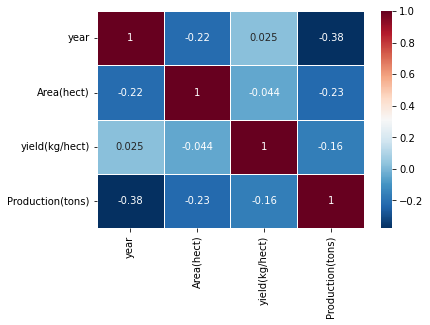

In [346]:
# Getting plotted data using person correlation
sns.heatmap(pearsoncorr, 
           xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)



# Output

Year and Production(tons) are increasing correspondingly when the area(hect) increasing

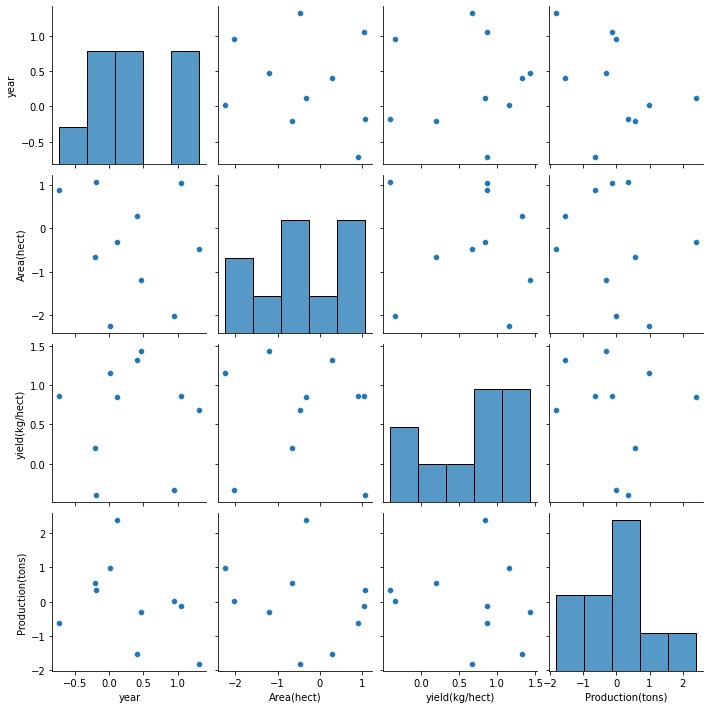

In [347]:
# Getting plotted data using pairplot
sns.pairplot(crop)

# Output

When the Area(hect) is increasing the production(tons) is also increasing correspondingly. 

In [348]:
# Normalizing the data
crop1["output"] = (crop1["Production(tons)"] - min(crop1["Production(tons)"]))/(max(crop1["Production(tons)"])-min(crop1["Production(tons)"]))
                                                                        

In [349]:
crop1["Production(tons)"]

0      5700.3
1      6451.3
2      6451.3
3      4929.7
4      5604.7
        ...  
724       2.9
725       2.9
726       2.9
727       3.3
728       3.3
Name: Production(tons), Length: 729, dtype: float64

In [350]:
crop1

,year,State,Area(hect),Production(tons),yield(kg/hect),output
0,1974,Andhra Pradesh,NaN,5700.3,1604.0,0.408527
1,1975,Andhra Pradesh,3894.5,6451.3,1657.0,0.462364
2,1975,Andhra Pradesh,3894.5,6451.3,1657.0,0.462364
3,1976,Andhra Pradesh,3565.2,4929.7,1383.0,0.353284
4,1977,Andhra Pradesh,3662.3,5604.7,1530.0,0.401673
...,...,...,...,...,...,...
724,1995,DAMAN AND DIU,2.0,2.9,1450.0,0.000093
725,1996,DAMAN AND DIU,2.0,2.9,1450.0,0.000093
726,1997,DAMAN AND DIU,2.0,2.9,1450.0,0.000093
727,1998,DAMAN AND DIU,2.0,3.3,1650.0,0.000122


# Output

We have changed the range of data from 0 to 1 by normalizing  the production(tons) columns.

In [351]:
# Encoding the onehot encoder and label encoder

encoder = LabelEncoder()
encoder.fit(crop1['State'])
values = encoder.transform(crop1['State'])

oh_encoder = OneHotEncoder()
c_reshaped = np.array(crop1['State']).reshape(-1, 1)
new_values = oh_encoder.fit_transform(c_reshaped)

In [352]:
new_df = pd.get_dummies(crop1, columns=['State'])
new_df

,year,Area(hect),Production(tons),yield(kg/hect),output,State_ANDAMAN & NICOBAR,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,...,State_MIZORAM,State_NAGALAND,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_SIKKIM,State_TAMILNADU,State_TRIPURA,State_UTTAR PRADESH,State_WEST BENGAL
0,1974,NaN,5700.3,1604.0,0.408527,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1975,3894.5,6451.3,1657.0,0.462364,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1975,3894.5,6451.3,1657.0,0.462364,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1976,3565.2,4929.7,1383.0,0.353284,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1977,3662.3,5604.7,1530.0,0.401673,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,1995,2.0,2.9,1450.0,0.000093,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
725,1996,2.0,2.9,1450.0,0.000093,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
726,1997,2.0,2.9,1450.0,0.000093,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
727,1998,2.0,3.3,1650.0,0.000122,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Output
We are encoding the samples of state feature to 1 and 0

In [353]:
# standard scaling
scaled_features = StandardScaler().fit_transform(new_df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=new_df.index, columns=new_df.columns)

In [354]:
scaled_features_df

,year,Area(hect),Production(tons),yield(kg/hect),output,State_ANDAMAN & NICOBAR,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,...,State_MIZORAM,State_NAGALAND,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_SIKKIM,State_TAMILNADU,State_TRIPURA,State_UTTAR PRADESH,State_WEST BENGAL
0,-1.663027,NaN,1.121123,0.006341,1.121123,-0.192313,5.099020,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
1,-1.529816,1.274929,1.368582,0.089997,1.368582,-0.192313,5.099020,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
2,-1.529816,1.274929,1.368582,0.089997,1.368582,-0.192313,5.099020,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
3,-1.396606,1.101810,0.867205,-0.342488,0.867205,-0.192313,5.099020,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
4,-1.263396,1.152857,1.089622,-0.110461,1.089622,-0.192313,5.099020,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,1.134388,-0.771429,-0.756207,-0.236734,-0.756207,-0.192313,-0.196116,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
725,1.267599,-0.771429,-0.756207,-0.236734,-0.756207,-0.192313,-0.196116,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
726,1.400809,-0.771429,-0.756207,-0.236734,-0.756207,-0.192313,-0.196116,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
727,1.534019,-0.771429,-0.756076,0.078949,-0.756076,-0.192313,-0.196116,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313


In [355]:
scaled_features_df.corr()

,year,Area(hect),Production(tons),yield(kg/hect),output,State_ANDAMAN & NICOBAR,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,...,State_MIZORAM,State_NAGALAND,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_SIKKIM,State_TAMILNADU,State_TRIPURA,State_UTTAR PRADESH,State_WEST BENGAL
year,1.000000,0.029533,0.160417,0.319561,0.160417,0.000404,-0.010715,0.000404,0.000404,0.000404,...,0.000404,0.000404,0.000404,0.000404,0.000404,0.000404,0.000404,0.000404,0.000404,0.000404
Area(hect),0.029533,1.000000,0.881269,-0.047895,0.881269,-0.147461,0.232734,-0.138425,0.081510,0.364037,...,-0.142934,-0.137031,0.294672,0.018760,-0.133385,-0.147037,0.079429,-0.121155,0.389228,0.406782
Production(tons),0.160417,0.881269,1.000000,0.292453,1.000000,-0.144090,0.378320,-0.138597,0.020247,0.198313,...,-0.141755,-0.137808,0.161103,0.187169,-0.135277,-0.144460,0.215020,-0.118978,0.357656,0.449361
yield(kg/hect),0.319561,-0.047895,0.292453,1.000000,0.292453,0.120877,0.172678,-0.153427,-0.137690,-0.160467,...,-0.162242,-0.170134,-0.151793,0.447578,-0.161763,-0.144599,0.290222,-0.010642,-0.039643,0.026694
output,0.160417,0.881269,1.000000,0.292453,1.000000,-0.144090,0.378320,-0.138597,0.020247,0.198313,...,-0.141755,-0.137808,0.161103,0.187169,-0.135277,-0.144460,0.215020,-0.118978,0.357656,0.449361
State_ANDAMAN & NICOBAR,0.000404,-0.147461,-0.144090,0.120877,-0.144090,1.000000,-0.037716,-0.036984,-0.036984,-0.036984,...,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984
State_Andhra Pradesh,-0.010715,0.232734,0.378320,0.172678,0.378320,-0.037716,1.000000,-0.037716,-0.037716,-0.037716,...,-0.037716,-0.037716,-0.037716,-0.037716,-0.037716,-0.037716,-0.037716,-0.037716,-0.037716,-0.037716
State_Arunachal Pradesh,0.000404,-0.138425,-0.138597,-0.153427,-0.138597,-0.036984,-0.037716,1.000000,-0.036984,-0.036984,...,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984
State_Assam,0.000404,0.081510,0.020247,-0.137690,0.020247,-0.036984,-0.037716,-0.036984,1.000000,-0.036984,...,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984
State_Bihar,0.000404,0.364037,0.198313,-0.160467,0.198313,-0.036984,-0.037716,-0.036984,-0.036984,1.000000,...,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984,-0.036984


In [356]:
scaled_features_df.dropna(inplace = True)

In [357]:
from sklearn.model_selection import train_test_split
x,y = scaled_features_df.drop(['Production(tons)', 'output'], axis=1), scaled_features_df['output']

In [358]:
x

,year,Area(hect),yield(kg/hect),State_ANDAMAN & NICOBAR,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_DADRA AND NAGAR,State_DAMAN AND DIU,...,State_MIZORAM,State_NAGALAND,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_SIKKIM,State_TAMILNADU,State_TRIPURA,State_UTTAR PRADESH,State_WEST BENGAL
1,-1.529816,1.274929,0.089997,-0.192313,5.099020,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
2,-1.529816,1.274929,0.089997,-0.192313,5.099020,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
3,-1.396606,1.101810,-0.342488,-0.192313,5.099020,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
4,-1.263396,1.152857,-0.110461,-0.192313,5.099020,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
5,-1.130186,1.319405,0.423043,-0.192313,5.099020,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,1.134388,-0.771429,-0.236734,-0.192313,-0.196116,-0.192313,-0.192313,-0.192313,-0.192313,5.199852,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
725,1.267599,-0.771429,-0.236734,-0.192313,-0.196116,-0.192313,-0.192313,-0.192313,-0.192313,5.199852,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
726,1.400809,-0.771429,-0.236734,-0.192313,-0.196116,-0.192313,-0.192313,-0.192313,-0.192313,5.199852,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
727,1.534019,-0.771429,0.078949,-0.192313,-0.196116,-0.192313,-0.192313,-0.192313,-0.192313,5.199852,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313


In [359]:
y

1      1.368582
2      1.368582
3      0.867205
4      1.089622
5      1.691795
         ...   
724   -0.756207
725   -0.756207
726   -0.756207
727   -0.756076
728   -0.756076
Name: output, Length: 728, dtype: float64

# Output
All the samples are distributed within the each feature with center around 0 and the standard deviation of 1

In [360]:
# break the data into two parts of train and test.
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [361]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

y_predict = linear_regressor.predict(x_test)

In [362]:
len(x_train),len(y_train)

(546, 546)

In [363]:
x_test.shape,y_test.shape

((182, 31), (182,))

In [364]:
x_test

,year,Area(hect),yield(kg/hect),State_ANDAMAN & NICOBAR,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_DADRA AND NAGAR,State_DAMAN AND DIU,...,State_MIZORAM,State_NAGALAND,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_SIKKIM,State_TAMILNADU,State_TRIPURA,State_UTTAR PRADESH,State_WEST BENGAL
147,0.468337,-0.493482,-0.172019,-0.192313,-0.196116,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
228,0.867968,-0.628959,0.405680,-0.192313,-0.196116,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
263,-1.396606,-0.323307,-0.208323,-0.192313,-0.196116,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
170,0.068707,-0.529599,1.141221,-0.192313,-0.196116,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
41,0.201917,-0.709079,-0.748141,-0.192313,-0.196116,5.199852,-0.192313,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,-0.597345,-0.710341,-1.357409,-0.192313,-0.196116,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,5.199852,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
374,-0.464134,-0.713810,-0.669220,-0.192313,-0.196116,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
286,1.667229,-0.588637,0.953390,-0.192313,-0.196116,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313
629,-1.130186,1.732777,-0.314077,-0.192313,-0.196116,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,...,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,-0.192313,5.199852


In [365]:
x_test.iloc[:1,:].shape

(1, 31)

# Output

Splitted the data between train and test
x_train = 546 and y_train = 546
x_test = 182 and y_test = 182

In [373]:
# simple linear regression
print(mean_squared_error(y_test, y_predict))
print("Mean square root error", math.sqrt(mean_squared_error(y_test, y_predict)))
print("Mean absoulte error", mean_absolute_error(y_test, y_predict))
print("Coefficient of determination R^2: %.2f" % r2_score(y_test, y_predict))
print("R2 score",linear_regressor.score(x_test,y_test)*100)


0.03797259664409152
Mean square root error 0.19486558609485544
Mean absoulte error 0.1256289300071625
Coefficient of determination R^2: 0.96
R2 score 96.26390824417868


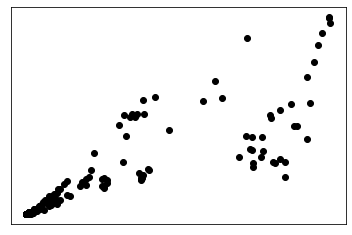

In [369]:
# Plot outputs
plt.scatter(x_test.iloc[:,1], y_test, color="black")

#plt.plot(x_test.iloc[:,1], y_test, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
plt.scatter(x_test.iloc[:,1], y_predict, color="blue", linewidth=1)

# Output
Predecting the dependent variable(y) values near to independent variables(x) in Linear regression model.

In [ ]:
# support vector regression
svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(x, y)

In [ ]:
svr_predict = svr_regressor.predict(x_test)

In [374]:
print("Mean squared error",mean_squared_error(y_test, svr_predict))
print("Mean square root error",math.sqrt(mean_squared_error(y_test, svr_predict)))
print("Mean absoulte error", mean_absolute_error(y_test, y_predict))
print("Coefficient of determination R^2: %.2f" % r2_score(y_test, svr_predict))
print("R2 score",svr_regressor.score(x_test,y_test)*100)

Mean squared error 0.011301117231723553
Mean square root error 0.10630671301344781
Mean absoulte error 0.1256289300071625
Coefficient of determination R^2: 0.99
R2 score 98.8880926074993


In [ ]:
# Plot outputs
plt.scatter(x_test.iloc[:,1], y_test, color="black")

#plt.plot(x_test.iloc[:,1], y_test, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
plt.scatter(x_test.iloc[:,1], svr_predict, color="blue", linewidth=1)

# Output
Predecting the dependent variable(y) values near to independent variables(x) in suport vector regression model.

In [ ]:
# decision tree regression
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(x, y)

In [ ]:
tree_predict = tree_regressor.predict(x_test)

In [375]:
print("Mean squared error", mean_squared_error(y_test, tree_predict))
print("Mean square root error", math.sqrt(mean_squared_error(y_test, tree_predict)))
print("Mean absoulte error", mean_absolute_error(y_test, y_predict))
print("Coefficient of determination R^2: %.2f" % r2_score(y_test, tree_predict))
print("R2 score",svr_regressor.score(x_test,y_test)*100)

Mean squared error 2.031750271001919e-34
Mean square root error 1.425394777246612e-17
Mean absoulte error 0.1256289300071625
Coefficient of determination R^2: 1.00
R2 score 98.8880926074993


In [ ]:
# Plot outputs
plt.scatter(x_test.iloc[:,1], y_test, color="black")

#plt.plot(x_test.iloc[:,1], y_test, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
plt.scatter(x_test.iloc[:,1], tree_predict, color="blue", linewidth=1)

# Output

Predecting the dependent variable(y) values exactly with independent variables(x) in decission tree regression model.
After comparing all the three regressions, decision tree regression is the best model.